## Before submitting
1. Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

2. Make sure that no assertions fail or exceptions occur, otherwise points will be subtracted.

4. Please submit only the `*.ipynb` file.

5. Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE". Edit only between `YOUR CODE HERE` and `END YOUR CODE`.

6. Make sure to use Python 3, not Python 2.

Fill your group name and collaborators below:

In [1]:
GROUPNAME = "17"
COLLABORATORS = "Aleksandra Kudaeva, Tor Istvan Stadler Kjetså"

### Task:

In this exercise we'll perform bayesian analysis on some toy data drawn from the **Exponential** distribution with the given rate. 

For this reason _posterior, marginal_ as well as _predictive_ distribution have to be computed, assumed that the _prior_ distribution over the exponential rate parameter is **Gamma**.

### Exercise 1.1: (5 pts) 

In this exercise you've to generate some toy data from **_Exponential_** distiribution given a **_rate_** = 0.35

Sample and sort 100 datapoints using **_expon_** function from _scipy.stats_ package (already imported).

**Note:** _scale_ is an inverse _rate_ value !

In [2]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from scipy.stats import gamma, expon
expon.random_state = 42
gamma.random_stat = 42
np.random.seed(42)

In [3]:
# Toy data generation
rate = 0.35 # True rate
scale = 1./rate # scale it's an inverse rate

x = expon.rvs(size = 100, scale = scale)

### Exercise 1.2: (5 pts)

Create an histogram **density** plot for the generated data (number of bins = 20, width=80%, transparency=50%). 

Add the KDE (kernel-density estimated) plot from the **_seaborn_** package (already imported).

Your plot should look like:

<img src='hist.png'/>

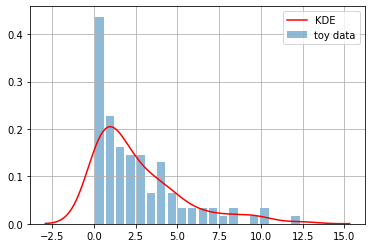

In [4]:
import seaborn as sns
# Histogram plot 
plt.hist(x,bins=20, rwidth=0.8, alpha=0.5, density=True, label='toy data')

_=plt.grid()
_=sns.kdeplot(x, color='r', label = 'KDE')
_=plt.legend()

### Exercise 2.1: (5 pts)

* Implement a robust Exponential probability density function (PDF).

**Note:** robust means all of the intermediate steps performed in the **_log-space_** however an exponentiated result is returned. 

### Model distribution (Exponential)
<center>
$\large{
 p(x | \lambda) = \text{Exp}(\lambda) =  \lambda\exp{(-\lambda x)} 
}$</center>

<center>
$\large{  
 \mathbb{E}[x]_{x \sim \text{Exp}(\lambda)}= \frac{1}{\lambda}
}$</center>
    <hr>

In [17]:
from numpy import log,exp
def exp_pdf(X,lambd):
    pdf = np.log(lambd) - lambd*X
    return np.exp(pdf)

### Exercise 2.2: (10 pts)

* Plot the Exponential PDF for the given rate values, colors and the region (see below). 


* Depict the true exectation values for each of the PDFs.

Your plot should look like:

<img src='exp_pdf.png'/>

In [18]:
rates = np.array([0.2, 0.5, 1, 2])
colors = ['r', 'g', 'b', 'k']
region = np.linspace(0,6,100)

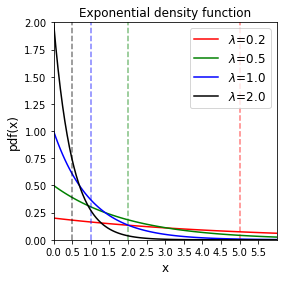

In [19]:
plt.figure(figsize=(4,4))
plt.title('Exponential density function')
for n,rate in enumerate(rates):
    # YOUR CODE HERE
    lab = '$\\lambda$' + '=' + str(rate)
    PDF = exp_pdf(region, rate)
    EV  = 1/rate
    plt.plot(region, PDF, label = lab, color = colors[n])
    _ = plt.axvline(x = EV, alpha = 0.5, color = colors[n], ls = "--")
plt.xticks(np.arange(0,5.6,0.5))
plt.xlim(0,6)
plt.ylim(0,2)
plt.xlabel('x',fontsize=12)
plt.ylabel('pdf(x)',fontsize=12)
_=plt.legend(fontsize=12)


### Exercise 2.3: (5 pts)

* Draw from the **_expon_** function enough samples such that the empirical mean is close to the true expectaton values for each of the rates.

In [20]:
expectations = 1/rates
emp_means = []
N = 1000000
for lambd in rates:
    s = expon.rvs(size = N, scale = 1/lambd)
    emp_means.append(s.mean()) 

In [21]:
print(expectations-emp_means)
assert np.allclose(expectations, emp_means , atol=1e-2)

[ 4.78649894e-03  1.14486500e-03 -3.98423741e-05  6.25247273e-04]


### Exercise 3.1: (10 pts)

* Implement the robust Gamma PDF with the **shape ($\alpha$)** and **rate ($\beta$)** parameters. 


* Use $\log{\Gamma(x)}$ function called **_loggamma_** from _scipy.special_ package (already imported).


* Check that the distibution parameters are strictly positive. 

**Note:** robust means all of the intermediate steps performed in the **_log-space_** however an exponentiated result is returned.

### Prior distribution (Gamma)
<center>
$\large{
p(\lambda | \alpha, \beta ) = \frac{\beta^{\alpha}}{\Gamma{(\alpha)}} \lambda^{\alpha-1}\exp{(-\beta\lambda)}
}$

In [22]:
from scipy.special import loggamma as lgam
from numpy import log

def gamma_pdf(lambd, alpha, beta=1):
    log_pdf = alpha*np.log(beta)+(alpha-1)*np.log(lambd)-lgam(alpha)-beta*lambd
    return np.exp(log_pdf)    

### Exercise 3.2: (15 pts)

* Plot the Gamma PDF for the 1000 datapoints sampled from the **_gamma_** function from the _scipy.stats_ package (already imported) with the given parameters **$\alpha$** and **$\beta$** and colors. 


* Extend it with the **_histogramm density_** plot with 50 bins each and 40 % transparency.


* Compute and plot the empirical mean over the sampled datapoints for each of the parameters.

Your plot should look like:

<img src="gam_hist.png"/>

In [23]:
from matplotlib import cm
alpha_beta = [(1,0.1),(1,0.3),(1,0.5),(4,2),(8,2),(16,2)]
colors = ['r','g','b','y','k','c']
N_samples = 1000
region = np.linspace(0,20,1000) 

C:\Users\Alexandra\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\Users\Alexandra\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


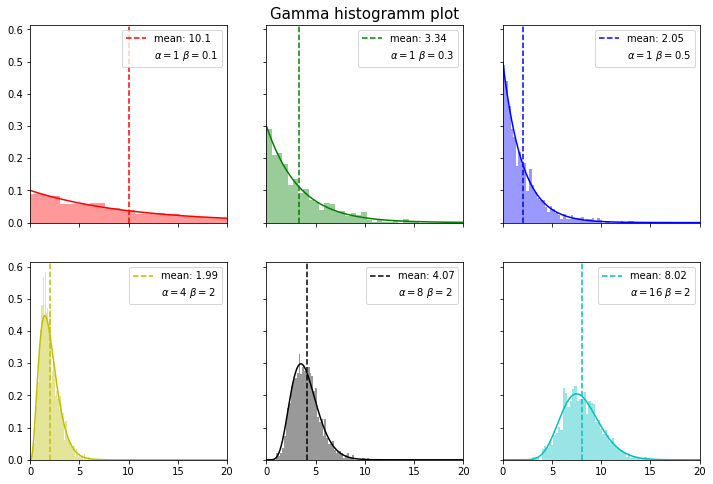

In [24]:
fig, axs = plt.subplots(2, 3, sharey=True,sharex=True, figsize = (12,8))
n = 0
for i in range(2):
    for j in range(3):
        ax = axs[i,j]
        alpha, beta = alpha_beta[n]
        smpls = gamma.rvs(alpha, scale = 1/beta, size = N_samples)
        mn = np.mean(smpls)
        
        ax.plot(region, gamma_pdf(lambd = region, 
                                  alpha = alpha, 
                                  beta = beta), 
                color = colors[n])
        _ = ax.hist(smpls, color = colors[n], alpha = 0.4, bins = 50, density = True)
        
        ax.set_xlim(0,20)
        ax.axvline(smpls.mean(), ls='--', color=colors[n], label=f'mean: {mn:0.3}')
        ax.plot(0, 0, alpha=0, label=f'$\\alpha=${alpha} $\\beta=${beta}')
        ax.legend()
        n+=1
_=axs[0,1].set_title('Gamma histogramm plot', fontsize=15)

### Exercise 4.1: (5 pts)

* Evaluate the *posterior* distribution given the model distribution is **Exponential** and *prior* is **Gamma** with parameters $\alpha$ and $\beta$. 


* Find the posterior parameters called $\hat{\alpha}$ and $\hat{\beta}$.

#### Posterior distribution

<center>
    $\large{
    p(\lambda|X,\alpha,\beta) = \overbrace{p(X|\lambda)p(\lambda|\alpha,\beta)}^{\text{product rule}} = \overbrace{\text{Exp}(\lambda)}^{\text{likelihood}}\ \overbrace{\text{Gamma}(\alpha,\beta)}^{\text{prior}}
     \\
    \quad \qquad \quad \text{Gamma}(\hat{\alpha}, \hat{\beta})
    }$
</center>
<br>

<center>
    $\large{
    p(\lambda|X,\alpha,\beta) = \text{Gamma}(\hat{\alpha}, \hat{\beta}),\  \text{where} \\ \quad \boxed{ \hat{\alpha} = {\alpha}+n, \quad \hat{\beta} = {\beta} + {\sum^n_{i=1}x_i}}
    }$
</center>

### Exercise 4.2: (5 pts)

* Implement the posterior PDF as a function of the generated datapoints called $X_{tr}$ and prior parameters $\alpha$ and $\beta$.


* Check that all of the input parameters are strictly positive. (Use e.g **assert** python statement)

In [25]:
def posterior(X, X_tr,alpha,beta):
    a_hat = alpha + len(X_tr)
    b_hat = beta + sum(X_tr) 
    post_pdf = gamma_pdf(lambd = X,alpha = a_hat,beta = b_hat)
    assert a_hat, b_hat > 0
    return post_pdf, a_hat, b_hat

### Exercise 4.3: (5 pts)

* Plot posterior PDF within the given **space range** for all of the prior paramters $\alpha$ and $\beta$.


* Compute and depict the Bayes estimator $\mathbb{E}[\lambda]$.

Your plot should look like:

<img src='post.png'/>

In [26]:
space_range = np.linspace(0.1,1,500)

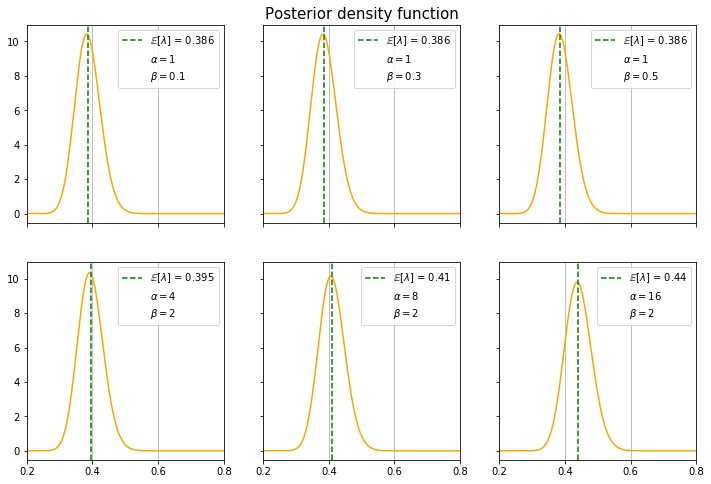

In [45]:
fig, axs = plt.subplots(2, 3, sharey=True, sharex=True,figsize = (12,8))
n = 0
Exs = []
for i in range(2):
    for j in range(3):
        ax = axs[i,j]
        alpha,beta = alpha_beta[n]
    
        pst, a_hat, b_hat = posterior(X = space_range, 
                                      X_tr = x, 
                                      alpha = alpha, 
                                      beta = beta)
        
        estimator = a_hat/b_hat
        
        ax.plot(space_range, pst, color = "orange")
        
        label = '$\mathbb{E}[\lambda]$' + f' = {estimator:0.3}'
        ax.axvline(estimator, ls='--', color="g", label=label)
        ax.plot(0, 0, alpha=0, label=f'$\\alpha=${alpha}')
        ax.plot(0, 0, alpha=0, label=f'$\\beta=${beta}')
        
        ax.grid(axis='x')
        ax.set_xlim(0.2,0.8)
        ax.legend()
        n+=1
_=axs[0,1].set_title('Posterior density function', fontsize=15)

### Exercise 4.3: (5 pts)

* Evaluate the *marginal* likelihood given the model distribution is **Exponential** and *prior* is **Gamma** with paramters $\alpha$ and $\beta$. 

#### Marginal likelihood

<center>
    $\large{
    p(X|\alpha,\beta) = \int \overbrace{p(X,\lambda|\alpha,\beta)}^{\text{marginalization}}\ d\lambda = \int \overbrace{p(X|\lambda)}^{\text{likelihood}} \underbrace{p(\lambda|\alpha,\beta)}_{\text{prior}}\ d\lambda 
    }$

<center>
    $\large{ 
         p(X|\alpha,\beta) = \frac{\beta^{\alpha}}{\Gamma{(\alpha)}} \int \lambda^{\alpha}\exp{(-\lambda(\beta+x))d\lambda}
}$ 

### Exercise 4.4: (5 pts)

* Implement the robust marginal PDF as a function of the given datapoints $X_{tr}$ and prior parameters $\alpha$ and $\beta$ 

**Note:** robust means all of the intermediate steps performed in the **_log-space_** however an exponentiated result is returned.

In [41]:
def marginal(X,alpha,beta):
    prior = gamma_pdf(lambd = X,alpha = alpha,beta = beta)
    like = exp_pdf(X = X, lambd = 0.35)
    post = prior*like
    return(sum(post))
    

### Exercise 4.5: (5 pts) 

* Perform the Bayesian model selection:


    * Compute the marginal likelihood for all of the given prior parameters $\alpha$ and $\beta$.

    * Find the _best_ prior parameters, which gives the highest marginal likelihood value. 
    
    * Find the Bayes estimator given the best prior parameters

In [42]:
marginals = []
for alpha,beta in alpha_beta:
    mrg = marginal(X = x, 
                  alpha = alpha, 
                  beta = beta)
    marginals.append(mrg)
n = np.argmax(marginals)
best_alpha, best_beta = alpha_beta[n]
bayes_est = marginals[n]
# YOUR CODE HERE
print("best alpha:",best_alpha)
print("best beta:",best_beta)
print(f"Bayes estimator: {bayes_est:0.3}", )

best alpha: 1
best beta: 0.5
Bayes estimator: 5.72


### Exercise 4.6: (5 pts)

* Plot the all of the marginal likelihood values and depict the best $\alpha$ and $\beta$ prior values.

Your plot should look like:

<img src="marginal.png">

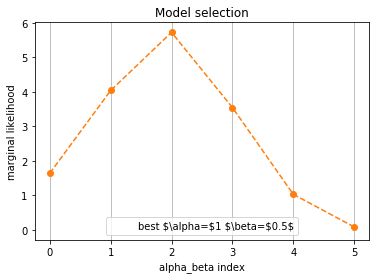

In [53]:
plt.title('Model selection')
plt.xlabel('alpha_beta index')
plt.ylabel('marginal likelihood')
plt.plot(0,0,alpha=0,label=f'best $\\alpha=${best_alpha} $\\beta=${best_beta}$')
plt.legend()
plt.grid(axis='x')

plt.plot(marginals, 'o--')

### Exercise 5.1: (5 pts)

* Evaluate the predictive distribution as a function of the given datapoints $X_{tr}$ and prior parameters $\alpha$ and $\beta$.

#### Predictive distribution

<center>
$\large{
    p(x|X,\alpha,\beta) = \int \overbrace{\underbrace{p(x|\lambda)}_{\text{likelihood}}\underbrace{p(\lambda|X,\alpha,\beta)}_{\text{posterior}}}^{\text{marginalization + product rule}} d\lambda = \\ \text{ YOUR ANSWER HERE}
}$ <br>
   

<center>
$\large{
\boxed{\widetilde{\alpha} = ?, \quad \widetilde{\beta} = ? }
}$

### Exercise 5.2: (5 pts)

* Implement the predictive PDF called **pred_dist** as a function of the given datapoints $X_{tr}$ and prior parameters $\alpha$ and $\beta$.

In [ ]:
def pred_dist(x,X,alpha,beta):
    
   # YOUR CODE HERE


### Exercise 5.3: (5 pts)

* Plot the predictive distribution within the given **space range** for the best prior parameters.

Your plot should look like:

<img src="predictive.png">

In [ ]:
space_range = np.linspace(0.1,15,100)

In [ ]:

# YOUR CODE HERE

plt.title('Predictive distribution',fontsize=15)
plt.xlim(0,15)
plt.grid(axis='x')
plt.xticks(np.arange(0,16))
_=plt.legend()